# CS M148 Project Check-In 1

## Chosen Data Set:
We chose to use the data set "Student Performance Factors"

## Main features we are studying:
We are mainly studying the values for **hours of sleep** and **test scores** because we want to explore to what extent sleep affects test scores.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import os

pd.set_option('display.max_columns', None)
pd.options.mode.copy_on_write = True

## Loading in the data

In [ ]:
import kagglehub
# Get the path to the CSV file
path = kagglehub.dataset_download("lainguyn123/student-performance-factors")
path = path + '/StudentPerformanceFactors.csv'
# Read the CSV file
student_performance_factors_original = pd.read_csv(path)
student_performance_factors_original

100%|██████████| 93.9k/93.9k [00:00<00:00, 6.87MB/s]

Extracting files...


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


The data column names match the names in the data dictionary

In [ ]:
# List the columns / variable names of the data
student_performance_factors_original.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [ ]:
# Show the first 20 rows
student_performance_factors_original.head(20)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


In [ ]:
# Show a random sample of 20 rows
student_performance_factors_original.sample(20)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
3167,21,93,Medium,High,Yes,6,67,High,Yes,1,Medium,High,Public,Positive,3,No,Postgraduate,Near,Female,73
1506,24,89,Low,High,Yes,6,60,Medium,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Near,Male,68
5964,28,64,Medium,Medium,No,8,78,Low,Yes,2,Medium,Medium,Private,Negative,3,No,Postgraduate,Near,Male,66
950,19,87,High,Low,Yes,8,86,Low,Yes,1,Medium,High,Public,Positive,4,No,High School,Moderate,Female,69
2413,14,98,Medium,Medium,Yes,8,91,Low,Yes,0,Low,Medium,Public,Negative,4,No,High School,Moderate,Male,67
1885,22,79,High,Medium,No,6,97,Medium,No,2,High,NaN,Public,Positive,2,No,College,Moderate,Female,69
1856,28,66,Medium,High,No,5,67,Medium,Yes,1,High,Medium,Private,Positive,1,No,Postgraduate,Moderate,Female,68
1544,16,72,Medium,High,No,6,58,Low,Yes,1,Medium,Medium,Public,Negative,2,No,High School,Far,Male,62
5524,15,79,Medium,High,Yes,7,66,Medium,Yes,2,Low,Medium,Public,Positive,3,No,College,Far,Female,66
2173,21,69,Medium,Medium,Yes,9,80,High,Yes,2,Medium,High,Public,Positive,5,No,College,Near,Male,68


## Examine the data and create action items

# Finding invalid values
Below, print a summary of the values of each numeric column

In [ ]:
student_performance_factors_original.select_dtypes('number').describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


All values seem to be listed in whole numbers, which makes sense for this dataset for all categories. There also don't seem to be any negative values. The only strange looking value here appears to be a max exam score of 101, where exams are typically scored out of 100. However, there could have been opportunity for extra credit on the exam.

Check how many values are missing from the dataset.

In [ ]:
student_performance_factors_original.isnull().sum().sum()

235

In [ ]:
student_performance_factors_original.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


It looks like the missing data values only come from three different columns: teacher quality, parental education level, and distance from home.

In [ ]:
# Identify duplicate rows
duplicate_rows = student_performance_factors_original[student_performance_factors_original.duplicated()]

# Count the number of duplicate rows
num_duplicates = duplicate_rows.shape[0]
num_duplicates

0

## Assessing Column Names

**Data cleaning action item: Clean the column names**

Rename the columns so that they are consistently formatted, with underscore-serparated words and human readable. Since we want to change the names of the variables themselves, we will do this manually.

We will officially change the column names when we actually clean our data below, so the remaining explorations until then will still use the original column names.

## Assessing variable type

In [ ]:
student_performance_factors_original.dtypes

,0
Hours_Studied,int64
Attendance,int64
Parental_Involvement,object
Access_to_Resources,object
Extracurricular_Activities,object
Sleep_Hours,int64
Previous_Scores,int64
Motivation_Level,object
Internet_Access,object
Tutoring_Sessions,int64


## Exploratory Data Analysis

Plot a scatter plot of sleep hours vs test scores.

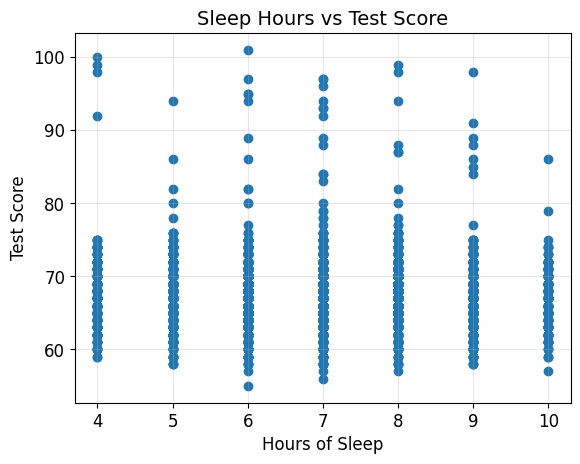

In [ ]:
plt.scatter(student_performance_factors_original['Sleep_Hours'], student_performance_factors_original['Exam_Score'])
plt.xlabel('Hours of Sleep', fontsize=12)
plt.ylabel('Test Score', fontsize=12)
plt.title('Sleep Hours vs Test Score', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

Since Hours of Sleep is categorical while Exam Score is continuous, we realized it would be better to create a boxplot instead.

<ipython-input-12-7bd0c0438c2a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sleep_Hours', y='Exam_Score', data=student_performance_factors_original, palette="Set3")


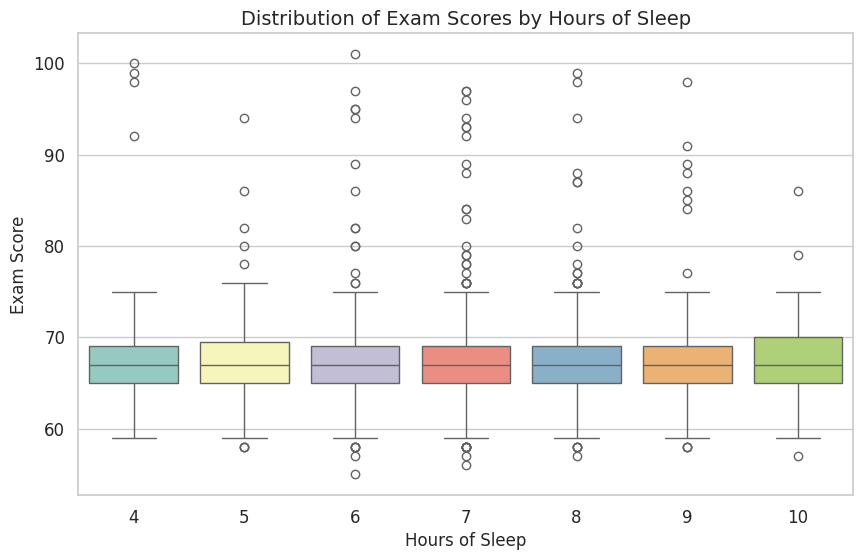

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sleep_Hours', y='Exam_Score', data=student_performance_factors_original, palette="Set3")
plt.xlabel('Hours of Sleep', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.title('Distribution of Exam Scores by Hours of Sleep', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Compared with the scatterplot, the boxplot provides a much more informative visualization of the distribution of exam score corresponding to each value for hours of sleep (ranging from 4-10). From the scatterplot, we can see that there are many outliers in the data. If we exclude the outliers, we see that the spread of exam scores is pretty similar for all of the values for hours of sleep; the only notable difference appears to be that the IQR for exam score corresponding to 10 hours of sleep is higher than that of the other values for hours of sleep. Now let's plot a histogram of hours of sleep vs. number of students to see how sleep hours are distributed.

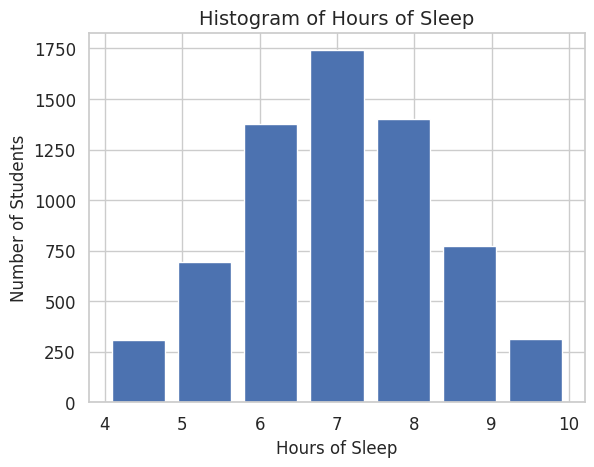

In [ ]:
plt.hist(student_performance_factors_original['Sleep_Hours'], bins=7, rwidth = 0.8)
plt.xlabel('Hours of Sleep', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.title('Histogram of Hours of Sleep', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Based on the histogram, the data looks pretty normally distributed, with an average of 7 hours of sleep.

Let's also make a bar plot of hours of sleep vs. the average test score for each hour.

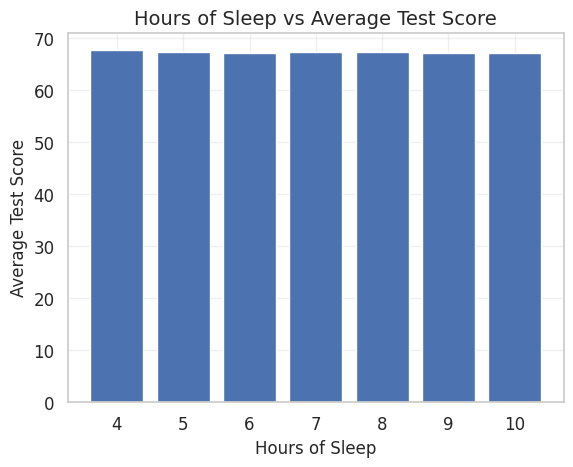

In [ ]:
# Calculate the average test score for each hour of sleep
sleep_hours_data = student_performance_factors_original['Sleep_Hours']
exam_scores = student_performance_factors_original['Exam_Score']
average = exam_scores.groupby(sleep_hours_data).mean()
sleep_hours = np.linspace(sleep_hours_data.min(), sleep_hours_data.max(), 7)


# Create a scatter plot of hours of sleep vs average test score
plt.bar(sleep_hours, average)
plt.xlabel('Hours of Sleep')
plt.ylabel('Average Test Score')
plt.title('Hours of Sleep vs Average Test Score', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.3)
plt.show()


The bar plot reveals that the average exam score does not fluctuate much with hours of sleep. This indicates that there is not a significant correlation between hours of sleep and exam score. This matches our findings from the boxplot, as we did not see a noticeable difference among the values for hours of sleep. We can confirm our suspicion about the lack of relationship between hours of sleep and exam score by creating a correlation matrix, as we do below.

# Pairwise Correlation of All Variables
Correlation plot below will show the relationships between pairs of variables in our dataset. Using pairwise correlation, it will reveal the strength and direction of these relationships. Moreover, it helps to identify any multicollinearity (variables highly correlated with one another) as having multicollinearity can make it harder to distinguish individual effects on our response variable. Finally, we can see which of the factors is influencing our outcome.

In [ ]:
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
le = LabelEncoder()

# Categorical data
categorical_data = ['Teacher_Quality', 'Motivation_Level', 'Parental_Education_Level',
                       'Parental_Involvement', 'Access_to_Resources', 'School_Type',
                       'Peer_Influence', 'Internet_Access', 'Learning_Disabilities', 'Gender',
                       'Family_Income', 'Distance_from_Home']

# Apply LabelEncoder to each categorical column
for column in categorical_data:
    student_performance_factors_original[column] = le.fit_transform(student_performance_factors_original[column])

# Get all variables for the correlation matrix including Exam_Score
corr_vars = student_performance_factors_original[['Exam_Score', 'Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
                       'Physical_Activity', 'Teacher_Quality', 'Motivation_Level', 'Tutoring_Sessions',
                       'Parental_Education_Level', 'Parental_Involvement', 'Access_to_Resources',
                       'School_Type', 'Peer_Influence', 'Internet_Access', 'Learning_Disabilities',
                       'Gender', 'Family_Income', 'Distance_from_Home']]

# Generate Correlation Matrix
corr_matrix = corr_vars.corr()

# Plot Correlation Matrix
fig = px.imshow(corr_matrix,
                labels = dict(color="Correlation"),
                aspect = "auto",
                color_continuous_scale = 'dense',
                title = 'Correlation Matrix of All Variables')

fig.update_layout(
    width = 1000,
    height = 800,
    title = {
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)

fig.show()

From the correlation matrix, we can see that our conclusion from the previous plot is correct - the correlation between exam score and hours of sleep is only -0.017.

Note: a better correlation matrix and better exploration of missingness was created in Check-in 4.